<a href="https://colab.research.google.com/github/RashikaTyagi01/Rashika-UCS420/blob/main/cognitiveAssignment7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q1. You are a data analyst at an e-commerce company. Your task is to analyze sales data,
clean and process it, perform staƟsƟcal analysis, and generate visual insights to help the
business make informed decisions.
1. Use your roll number as the random seed to generate unique data for each student.
2. Follow the quesƟons step by step, as each part builds upon the previous one.
3. Submit the assignment as a Jupyter Notebook (.ipynb) with:
 Well-documented code and clear comments.
 Markdown explanaƟons for each step.
 Screenshots of the plots and outputs.

Part I: Randomized Sales Data GeneraƟon (NumPy)
1. IniƟalize Random Seed
2. Generate Sales Data
 Create a NumPy array of random sales data for 12 months (shape = (12, 4)),
where each column represents a product category:
 Electronics, Clothing, Home & Kitchen, Sports.
 Sales values should be between 1000 and 5000 units per month.
 The range should be randomized using the seed.
3. Convert to DataFrame
 Convert the cleaned NumPy array into a Pandas DataFrame with:
i. Columns: Electronics, Clothing, Home & Kitchen, Sports
ii. Index: Months from Jan to Dec

In [2]:
import numpy as np
import pandas as pd

roll_number = int(input('Enter roll number as seed: '))
np.random.seed(roll_number)
data = np.random.randint(1000, 5000, size=(12,4))

columns = ['Electronics', 'Clothing', 'Home & Kitchen', 'Sports']
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct','Nov', 'Dec']
df = pd.DataFrame(data, columns=columns, index=months)
print(df)

Enter roll number as seed: 102317019
      Electronics  Clothing  Home & Kitchen  Sports
Jan          3946      4959            4414    4911
Feb          3331      4350            2728    4194
Mar          2133      4349            2498    1172
Apr          4102      2401            3289    1872
May          3866      3053            1075    4825
Jun          1367      3370            4194    3947
Jul          2155      1380            3879    3917
Aug          4117      4243            1421    3143
Sept         1209      2355            4750    2666
Oct          2150      4125            2266    1648
Nov          4613      4340            4668    2280
Dec          3405      4969            3885    3949


Part II: Data ManipulaƟon and Analysis (Pandas)
1. Display the first 5 rows and summary staƟsƟcs of the DataFrame.


In [4]:
print(df.head())
print()
stats = df.describe(include = 'all')
print(stats)

     Electronics  Clothing  Home & Kitchen  Sports
Jan         3946      4959            4414    4911
Feb         3331      4350            2728    4194
Mar         2133      4349            2498    1172
Apr         4102      2401            3289    1872
May         3866      3053            1075    4825

       Electronics     Clothing  Home & Kitchen       Sports
count    12.000000    12.000000       12.000000    12.000000
mean   3032.833333  3657.833333     3255.583333  3210.333333
std    1168.992094  1140.542760     1250.050141  1265.194080
min    1209.000000  1380.000000     1075.000000  1172.000000
25%    2145.750000  2890.000000     2440.000000  2178.000000
50%    3368.000000  4184.000000     3584.000000  3530.000000
75%    3985.000000  4349.250000     4249.000000  4010.250000
max    4613.000000  4969.000000     4750.000000  4911.000000


2. Calculate the total sales per category and total sales per month.


In [5]:
print("Total Sales Per Category: ")
total_sales_per_category = df.sum()
print(total_sales_per_category)
print()

print("Total Sales Per Month: ")
total_sales_per_month = df.sum(axis=1)
print(total_sales_per_month)

Total Sales Per Category: 
Electronics       36394
Clothing          43894
Home & Kitchen    39067
Sports            38524
dtype: int64

Total Sales Per Month: 
Jan     18230
Feb     14603
Mar     10152
Apr     11664
May     12819
Jun     12878
Jul     11331
Aug     12924
Sept    10980
Oct     10189
Nov     15901
Dec     16208
dtype: int64


3. Calculate the average sales growth between consecuƟve months for each category.

In [6]:
monthly_pct_change = df[columns].pct_change()
avg_growth = monthly_pct_change.mean()*100
print('Average Sales Growth Between Consecutive Months (%): ')
print(avg_growth)

Average Sales Growth Between Consecutive Months (%): 
Electronics       19.511434
Clothing          16.293085
Home & Kitchen    37.108105
Sports            13.662786
dtype: float64


4. Add the following columns to the DataFrame:
 Total Sales: Sum of all categories per month.
 Growth Rate: Percentage change in Total Sales from the previous month.


In [7]:
df['Total Sales'] = total_sales_per_month
df['Growth Rate (%)'] = df['Total Sales'].pct_change()*100
print('Updated dataframe: ')
print(df)

Updated dataframe: 
      Electronics  Clothing  Home & Kitchen  Sports  Total Sales  \
Jan          3946      4959            4414    4911        18230   
Feb          3331      4350            2728    4194        14603   
Mar          2133      4349            2498    1172        10152   
Apr          4102      2401            3289    1872        11664   
May          3866      3053            1075    4825        12819   
Jun          1367      3370            4194    3947        12878   
Jul          2155      1380            3879    3917        11331   
Aug          4117      4243            1421    3143        12924   
Sept         1209      2355            4750    2666        10980   
Oct          2150      4125            2266    1648        10189   
Nov          4613      4340            4668    2280        15901   
Dec          3405      4969            3885    3949        16208   

      Growth Rate (%)  
Jan               NaN  
Feb        -19.895776  
Mar        -30.480038  

5. Apply a randomized discount:
 If your roll number is even, apply a 10% discount to the Electronics category.

 If odd, apply a 15% discount to the Clothing category.

In [8]:
if roll_number % 2 == 0:
  df['Electronics'] = df['Electronics']*0.90
else:
  df['Clothing'] = df['Clothing']*0.85

print('Dataframe with discount: ')
print(df)

Dataframe with discount: 
      Electronics  Clothing  Home & Kitchen  Sports  Total Sales  \
Jan          3946   4215.15            4414    4911        18230   
Feb          3331   3697.50            2728    4194        14603   
Mar          2133   3696.65            2498    1172        10152   
Apr          4102   2040.85            3289    1872        11664   
May          3866   2595.05            1075    4825        12819   
Jun          1367   2864.50            4194    3947        12878   
Jul          2155   1173.00            3879    3917        11331   
Aug          4117   3606.55            1421    3143        12924   
Sept         1209   2001.75            4750    2666        10980   
Oct          2150   3506.25            2266    1648        10189   
Nov          4613   3689.00            4668    2280        15901   
Dec          3405   4223.65            3885    3949        16208   

      Growth Rate (%)  
Jan               NaN  
Feb        -19.895776  
Mar        -30.48

Part III: VisualizaƟons (Matplotlib and Seaborn)
1. Plot monthly sales trends for each category using line plots.
2. Create the following plots:
 Box plots to show the sales distribuƟon for each category.

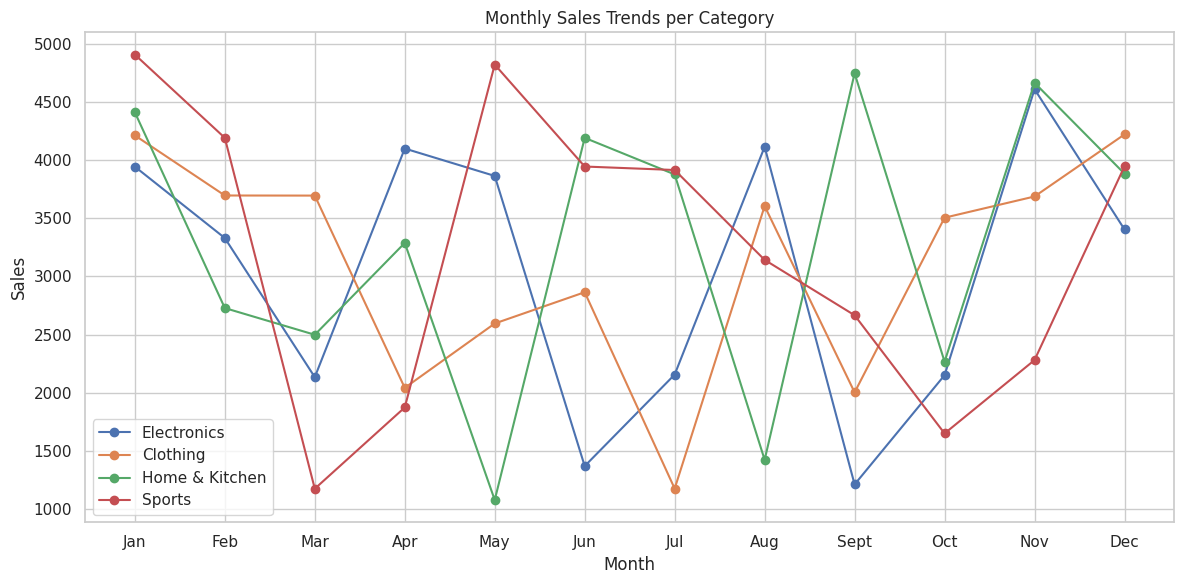

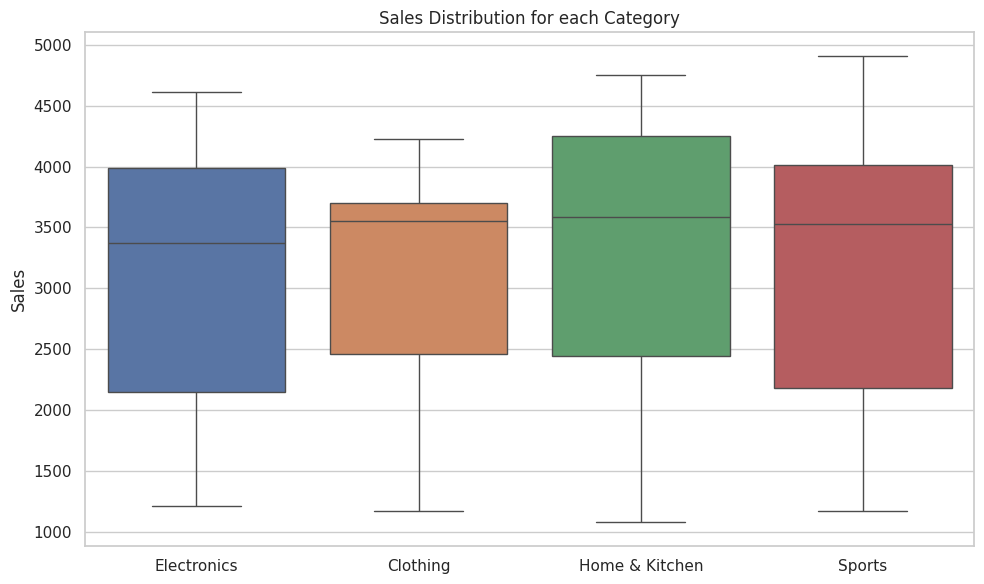

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')

plt.figure(figsize=(12, 6))
for category in ["Electronics", "Clothing", "Home & Kitchen", "Sports"]:
    plt.plot(df.index, df[category], marker='o', label=category)

plt.title("Monthly Sales Trends per Category")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.tight_layout();
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df[["Electronics", "Clothing", "Home & Kitchen", "Sports"]])
plt.title("Sales Distribution for each Category")
plt.ylabel("Sales")
plt.tight_layout()
plt.show()


Q.2 For the array: array = np.array([[1, -2, 3],[-4, 5, -6]])
i. Find element-wise absolute value
ii. Find the 25th, 50th, and 75th percenƟle of flaƩened array, for each column, for each
row.
iii. Mean, Median and Standard DeviaƟon of flaƩened array, of each column, and
each row

In [ ]:
import numpy as np
array = np.array([[1, -2, 3],[-4, 5, -6]])

abs_array = np.abs(array)
print('Element Wise Absolute Value: \n',abs_array)

flat_array = array.flatten()
percentile_flat = np.percentile(flat_array, [25, 50,75])
print('Percentiles for flattened array: \n', percentile_flat)
percentile_col = np.percentile(array, [25, 50,75], axis=0)
print('Percentiles for each column: \n', percentile_col)
percentile_rows = np.percentile(array, [25, 50, 75], axis=1)
print('Percentiles for each row: \n', percentile_rows)

mean_flat = np.mean(flat_array)
median_flat = np.median(flat_array)
std_flat = np.std(flat_array)
print('\nFor flattened array, Mean, Median, Standard Deviation: ',mean_flat, median_flat, std_flat)

mean_col = np.mean(array, axis=0)
median_col = np.median(array, axis=0)
std_col = np.std(array, axis=0)
print('\nFor each column, Mean, Median, Standard Deviation: ',mean_col, median_col, std_col)

mean_row = np.mean(array, axis=1)
median_row = np.median(array, axis=1)
std_row = np.std(array, axis=1)
print('\nFor each row, Mean, Median, Standard Deviation: ',mean_row, median_row, std_row)



Element Wise Absolute Value: 
 [[1 2 3]
 [4 5 6]]
Percentiles for flattened array: 
 [-3.5 -0.5  2.5]
Percentiles for each column: 
 [[-2.75 -0.25 -3.75]
 [-1.5   1.5  -1.5 ]
 [-0.25  3.25  0.75]]
Percentiles for each row: 
 [[-0.5 -5. ]
 [ 1.  -4. ]
 [ 2.   0.5]]

For flattened array, Mean, Median, Standard Deviation:  -0.5 -0.5 3.8622100754188224

For each column, Mean, Median, Standard Deviation:  [-1.5  1.5 -1.5] [-1.5  1.5 -1.5] [2.5 3.5 4.5]

For each row, Mean, Median, Standard Deviation:  [ 0.66666667 -1.66666667] [ 1. -4.] [2.05480467 4.78423336]


Q.3 For the array: a = np.array([-1.8, -1.6, -0.5, 0.5,1.6, 1.8, 3.0]).
i. Find floor, ceiling and truncated value, rounded values

In [ ]:
import numpy as np
a = np.array([-1.8, -1.6, -0.5, 0.5,1.6, 1.8, 3.0])
floor_values = np.floor(a)
ceiling_values = np.ceil(a)
truncated_values = np.trunc(a)
rounded_values = np.round(a)
print("Original Array:", a)
print("Floor Values:", floor_values)
print("Ceiling Values:", ceiling_values)
print("Truncated Values:", truncated_values)
print("Rounded Values:", rounded_values)

Original Array: [-1.8 -1.6 -0.5  0.5  1.6  1.8  3. ]
Floor Values: [-2. -2. -1.  0.  1.  1.  3.]
Ceiling Values: [-1. -1. -0.  1.  2.  2.  3.]
Truncated Values: [-1. -1. -0.  0.  1.  1.  3.]
Rounded Values: [-2. -2. -0.  0.  2.  2.  3.]


Q4. WAP to swap two elements in a list in Python Using a Temporary Variable.

In [ ]:
mylist = [10,20,30,40,50]
print("Original list: ", mylist)
i = 2
j = 4
temp = mylist[i]
mylist[i] = mylist[j]
mylist[j] = temp

print("List after swapping: ",mylist)

Original list:  [10, 20, 30, 40, 50]
List after swapping:  [10, 20, 50, 40, 30]


Q5. Write a Python program to swap two elements in a set by converƟng it to a list first.

In [ ]:
myset = {10, 15, 20, 25, 30}
print("Original Set: ", myset)
mylist = list(myset)
print("After converting to list: ", mylist)

i=2
j=4
temp = mylist[i]
mylist[i] = mylist[j]
mylist[j] = temp
print("List after swapping: ",mylist)
print("Set after swapping: ", set(mylist))

Original Set:  {20, 25, 10, 30, 15}
After converting to list:  [20, 25, 10, 30, 15]
List after swapping:  [20, 25, 15, 30, 10]
Set after swapping:  {10, 15, 20, 25, 30}
